## 1090 North Logan | Comparing Model | Selling Price Analysis

In [1]:
# Library Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="ticks")
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np 
import math 
from pandas_profiling import ProfileReport
%matplotlib inline 
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [2]:
# Ingest Data:
df = pd.read_excel(r'C:\Data Sciences\data\all_data\data.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          24 non-null     int64  
 1   sqft           24 non-null     int64  
 2   price/sqft     24 non-null     float64
 3   bedrms         24 non-null     int64  
 4   full_bath(s)   24 non-null     int64  
 5   half_baths(s)  24 non-null     int64  
 6   yr_built       24 non-null     int64  
 7   lot_size       24 non-null     int64  
 8   floor_plan     24 non-null     object 
 9   bsmnt_type     24 non-null     object 
dtypes: float64(1), int64(7), object(2)
memory usage: 2.0+ KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,24.0,340141.666667,12834.419303,320000.00000,328925.000000,344500.000000,350000.000000,364900.000000
sqft,24.0,2089.500000,306.532784,1496.00000,1876.000000,2092.000000,2292.250000,2782.000000
price/sqft,24.0,166.238235,25.873841,129.88189,148.451136,158.132646,180.179049,223.930481
bedrms,24.0,3.500000,0.510754,3.00000,3.000000,3.500000,4.000000,4.000000
full_bath(s),24.0,2.208333,0.414851,2.00000,2.000000,2.000000,2.000000,3.000000
half_baths(s),24.0,0.750000,0.442326,0.00000,0.750000,1.000000,1.000000,1.000000
yr_built,24.0,1992.625000,6.212277,1986.00000,1988.000000,1989.500000,1996.000000,2008.000000
lot_size,24.0,9157.791667,2061.457673,6401.00000,7618.500000,8474.000000,10229.250000,13245.000000


### The dataframe statistics represented above is based off the 24 properties for sale provided by Theresa.  The avg. price is about $344K with about 3 bedrooms and 2 full bathrooms.

In [5]:
# Apply built type to categorize older vs. newer:
def built_grouping(a):
    if a['yr_built'] >= 2000:
        return 'newer'

    else:
        return 'older'

df['built_type'] = df.apply(built_grouping, axis =1)

# Apply sq type to categorize over or under 2,000sq/ft:
def sqft_grouping(b):
    if b['sqft'] >= 1999.999999999999:
        return 'over'

    else:
        return 'under'

df['sqft_over_2000'] = df.apply(sqft_grouping, axis =1)

# Group lot size that is over 10000:
def lot_size_grouping(c):
    if c['lot_size'] >= 9999.999999999999:
        return 'over'

    else:
        return 'under'

df['lot_size_over_10000'] = df.apply(lot_size_grouping, axis =1)

# Nana type grouping:
def similar_house(d):
    if ((d['floor_plan'] == 'split') and (d['bsmnt_type'] == 'unfinished') and (d['sqft_over_2000'] == 'under')):
        return 'Nana Type'

    else:
        return 'Other'

df['same_type'] = df.apply(similar_house, axis =1)

## Exploratory Data Analysis

<AxesSubplot:title={'center':'Range of Year Built of Homes'}, xlabel='yr_built', ylabel='count'>

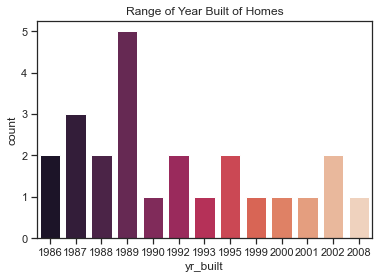

In [6]:
plt.title('Range of Year Built of Homes')
sns.countplot(x=df['yr_built'],palette='rocket')

<AxesSubplot:title={'center':'Basement Price (Mean) Grouped By Type'}, ylabel='bsmnt_type'>

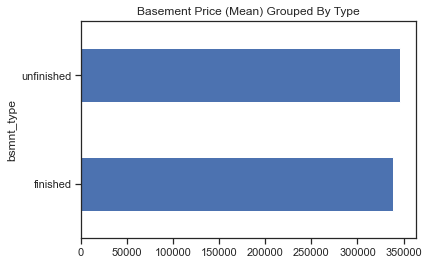

In [7]:
df.groupby('bsmnt_type')['price'].mean().plot(kind='barh',title='Basement Price (Mean) Grouped By Type')

<AxesSubplot:title={'center':'Bedroom Type Price (Mean) Grouped By Type'}, ylabel='bedrms'>

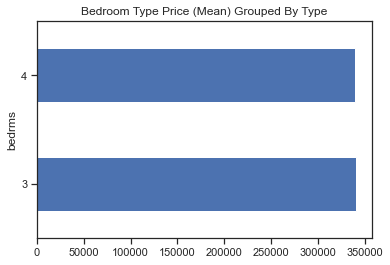

In [8]:
df.groupby('bedrms')['price'].mean().plot(kind='barh',title='Bedroom Type Price (Mean) Grouped By Type')

<AxesSubplot:title={'center':'Floor Plan Price (Mean) Grouped By Type'}, ylabel='floor_plan'>

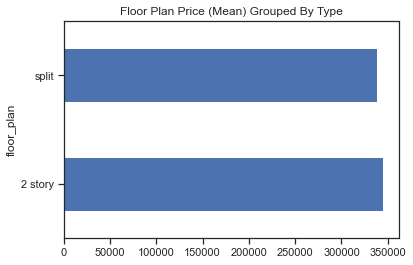

In [9]:
df.groupby('floor_plan')['price'].mean().plot(kind='barh',title='Floor Plan Price (Mean) Grouped By Type')

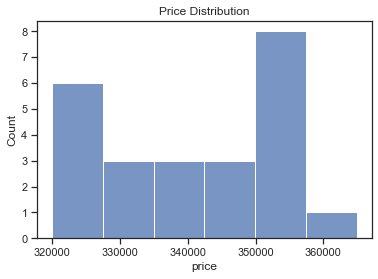

In [10]:
plt.title('Price Distribution')
sns.histplot(x=df['price'], data=df)
plt.show()

In [11]:
df.corr()

,price,sqft,price/sqft,bedrms,full_bath(s),half_baths(s),yr_built,lot_size
price,1.000000,0.081542,0.192893,-0.013597,0.147326,-0.206018,0.410061,0.065344
sqft,0.081542,1.000000,-0.949006,0.437663,0.313012,-0.268397,-0.068827,0.229360
price/sqft,0.192893,-0.949006,1.000000,-0.465240,-0.303148,0.256558,0.231341,-0.143195
bedrms,-0.013597,0.437663,-0.465240,1.000000,0.307794,-0.384900,-0.089068,-0.045898
full_bath(s),0.147326,0.313012,-0.303148,0.307794,1.000000,-0.888523,0.132856,-0.035586
half_baths(s),-0.206018,-0.268397,0.256558,-0.384900,-0.888523,1.000000,-0.067246,0.164587
yr_built,0.410061,-0.068827,0.231341,-0.089068,0.132856,-0.067246,1.000000,0.360732
lot_size,0.065344,0.229360,-0.143195,-0.045898,-0.035586,0.164587,0.360732,1.000000


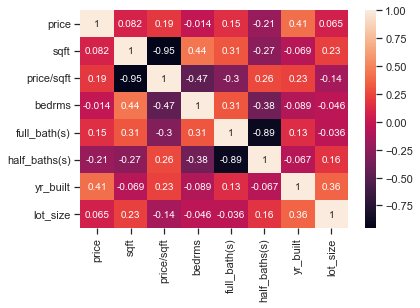

In [12]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

###  According to the correlation the higher the price the more likely year built and number of full bathrooms attribute to a higher asking price.  Number of bedrooms don't appear a big factor on asking price, yet your home is 3 bedrooms in a typical split.  

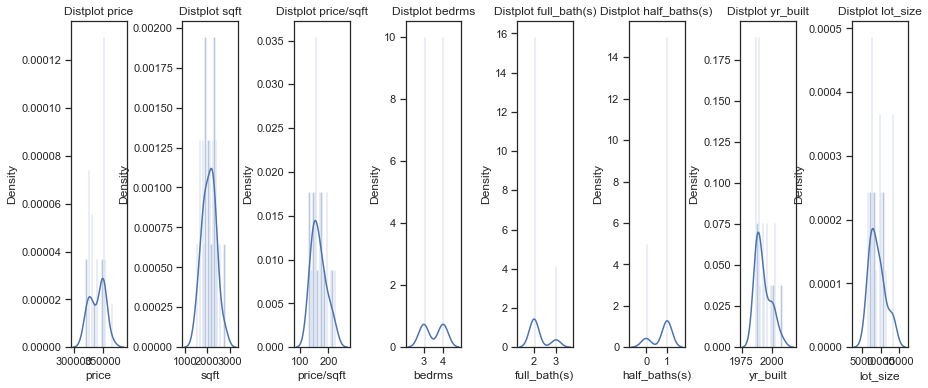

In [13]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['price','sqft','price/sqft','bedrms','full_bath(s)','half_baths(s)','yr_built','lot_size']:
    n += 1
    plt.subplot(1 , 8 , n)
    plt.subplots_adjust(hspace =0.75 , wspace = 1)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot {}'.format(x))
plt.show()

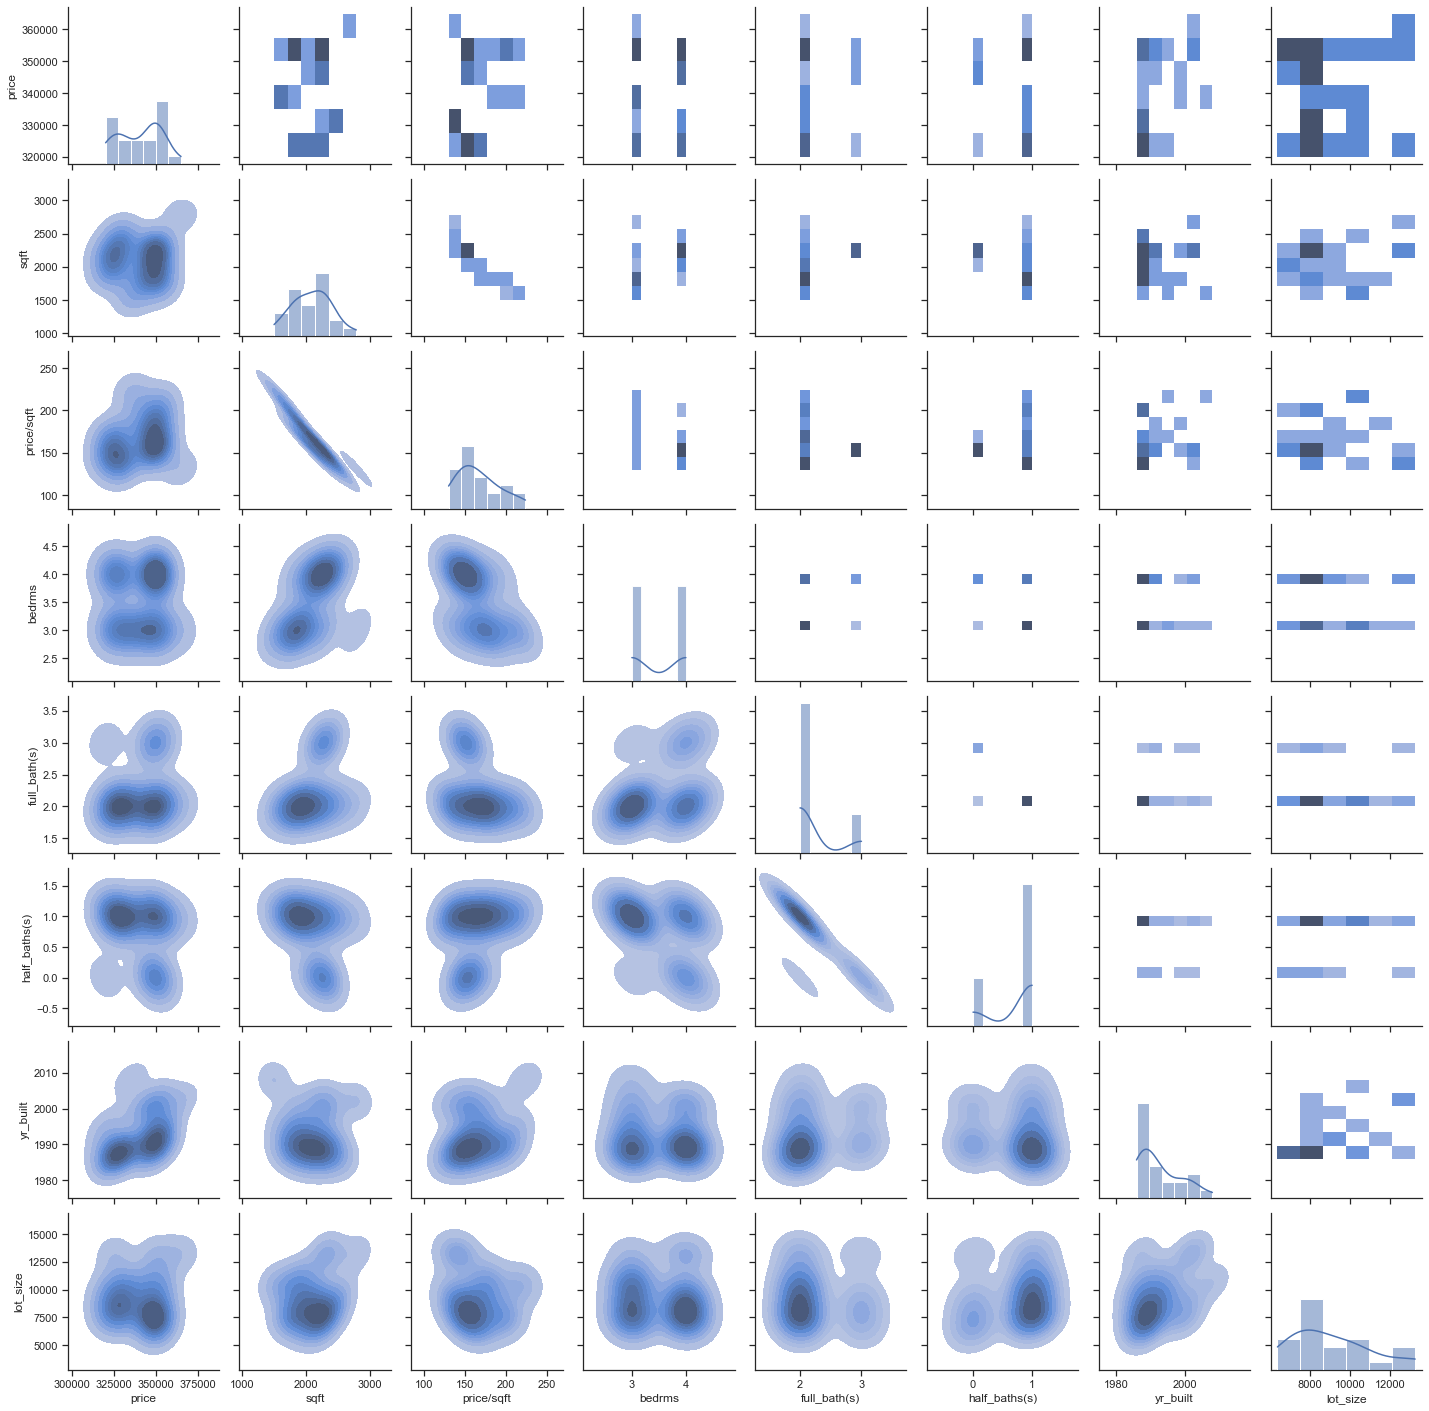

In [14]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

### In conclusion to the current analysis most comps are fairly close in metrics that includes asking price that appears to be +/- $10K from the mean of those currently on the market as of 7/20/2022.

## Unsupervised Machine Learning | KMeans | Group Together Like Properties

In [15]:
X1 = df[['price','sqft','bedrms','full_bath(s)','half_baths(s)','yr_built','lot_size']].iloc[: , :].values
# X1 = df[['price','sqft','price/sqft','bedrms','full_bath(s)','half_baths(s)','yr_built','lot_size']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

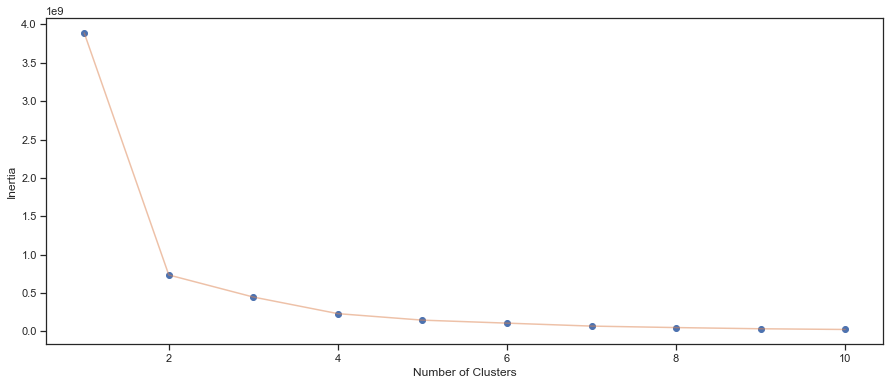

In [16]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [17]:
algorithm = (KMeans(n_clusters = 2 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
Cluster_1 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [18]:
df['Cluster_1'] =  Cluster_1
trace1 = go.Scatter3d(
    x= df['price'],
    y= df['full_bath(s)'],
    z= df['yr_built'],
    mode='markers',
     marker=dict(
        color = df['Cluster_1'], 
        size= 20,
        line=dict(
            color= df['Cluster_1'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'price'),
            yaxis = dict(title  = 'full_bath'),
            zaxis = dict(title  = 'yr_built')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [19]:
from sklearn.preprocessing import StandardScaler

df_num = df.select_dtypes(include=['float64','int64'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_num)

kmeans = KMeans(init = 'k-means++', n_clusters = 2, n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features)

df['Cluster_2'] = kmeans.labels_

In [20]:
df.to_excel(r'C:\Data Sciences\github\Data-Sciences\Real Estate\1090_north_logan_sell_metrics.xlsx')
print('Analysis Completed')

Analysis Completed


<AxesSubplot:title={'center':'Cluster_2 Price (Mean) Grouped By Type'}, ylabel='Cluster_2'>

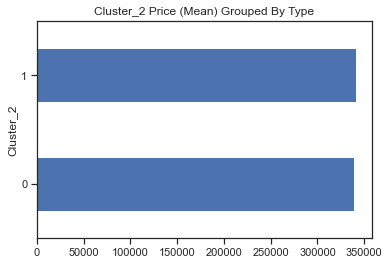

In [21]:
df.groupby('Cluster_2')['price'].mean().plot(kind='barh',title='Cluster_2 Price (Mean) Grouped By Type')

<AxesSubplot:title={'center':'same_type Price (Mean) Grouped By Type'}, ylabel='same_type'>

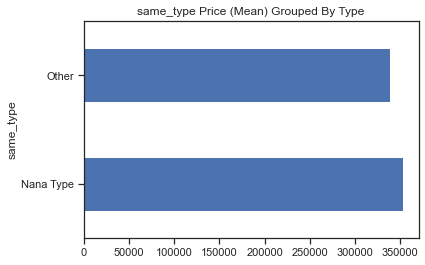

In [22]:
df.groupby('same_type')['price'].mean().plot(kind='barh',title='same_type Price (Mean) Grouped By Type')

In [23]:
!jupyter nbconvert --to html --no-input selling_metrics.ipynb

[NbConvertApp] Converting notebook selling_metrics.ipynb to html
[NbConvertApp] Writing 961547 bytes to selling_metrics.html


In [24]:
!jupyter nbconvert selling_metrics.ipynb --to html --output type_1_report.html

[NbConvertApp] Converting notebook selling_metrics.ipynb to html
[NbConvertApp] Writing 988256 bytes to type_1_report.html


In [25]:
!jupyter nbconvert selling_metrics.ipynb --to html --template basic --output type_2_report.html

[NbConvertApp] Converting notebook selling_metrics.ipynb to html
[NbConvertApp] Writing 405201 bytes to type_2_report.html
